<a href="https://colab.research.google.com/github/aekgmla77/2024-2-DeepLearning/blob/main/20240926_RNN_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
# parameters for data load
num_words = 30000
maxlen = 50
test_split = 0.3
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = num_words, maxlen = maxlen, test_split = test_split)

In [ ]:
# pad the sequences with zeros
# padding parameter is set to 'post' => 0's are appended to end of sequences
X_train = pad_sequences(X_train, padding = 'post')
X_test = pad_sequences(X_test, padding = 'post')

In [ ]:
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
y_data = np.concatenate((y_train, y_test))
y_data = to_categorical(y_data)
y_train = y_data[:1395]
y_test = y_data[1395:]

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1395, 49, 1)
(599, 49, 1)
(1395, 46)
(599, 46)


## vanilla RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Activation
from tensorflow.keras import optimizers
from scikeras.wrappers import KerasClassifier, KerasRegressor

def vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape = (49,1), return_sequences = False))
    model.add(Dense(46))
    model.add(Activation('softmax'))

    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.17.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/uninstall.py", line 106, in run
    uninstall_pathset = req.uninstall(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_install.py", line 722, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "/usr/local/lib/python3.10/dist-

In [ ]:
!pip install tensorflow

In [ ]:
pip install scikeras

In [ ]:
model = KerasClassifier(build_fn = vanilla_rnn, epochs = 200, batch_size = 50, verbose = 1)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.5118 - loss: 3.0317
Epoch 2/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7137 - loss: 1.3910
Epoch 3/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7175 - loss: 1.2304
Epoch 4/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7108 - loss: 1.1721
Epoch 5/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7193 - loss: 1.1553
Epoch 6/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7021 - loss: 1.1701
Epoch 7/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7238 - loss: 1.1140
Epoch 8/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7318 - loss: 1.1099
Epoch 9/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7065 - loss: 1.2234
Epoch 10/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7122 - loss: 1.1585
Epoch 11/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7007 - loss: 1.1986
Epoch 12/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy

KerasClassifier(
	model=None
	build_fn=<function vanilla_rnn at 0x7c83d92eb6d0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=50
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=200
	class_weight=None
)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy on Test Data: 75.63%
   True Labels  Predicted Labels
0            3                 3
1            4                 3
2            3                 3
3            3                 3
4            3                 3
5            3                 4
6           42                 4
7            3                 4
8            3                 3
9            3                 3


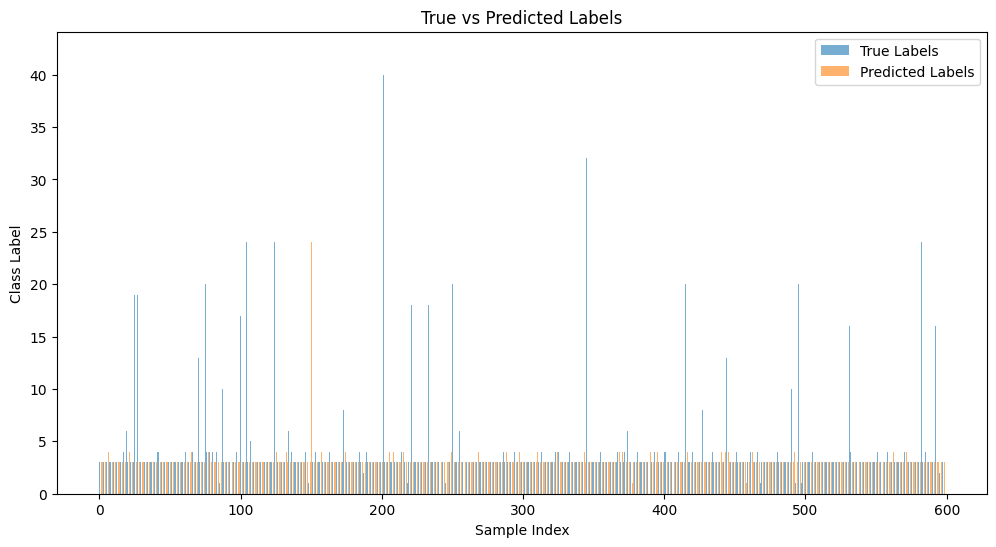

In [ ]:
import pandas as pd  # pandas 라이브러리 추가
import matplotlib.pyplot as plt  # matplotlib 임포트
# **결과 확인 추가 코드**
# 1. 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 2. 예측값에서 가장 높은 확률을 가지는 클래스 선택
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# 3. 정확도 계산
test_accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Accuracy on Test Data: {test_accuracy * 100:.2f}%')

# 4. 예측 결과를 데이터프레임으로 생성
results_df = pd.DataFrame({
    'True Labels': y_true_classes,
    'Predicted Labels': y_pred_classes
})

# 5. 예측 결과 일부 출력 (첫 10개 샘플)
print(results_df.head(10))  # 첫 10개의 예측 결과를 출력

# **그래프 시각화 추가 코드**
# 6. 정확도 시각화
labels = np.arange(len(y_true_classes))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(labels, y_true_classes, width, label='True Labels', alpha=0.6)
plt.bar(labels + width, y_pred_classes, width, label='Predicted Labels', alpha=0.6)

plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('True vs Predicted Labels')
plt.legend()
plt.show()